<a href="https://colab.research.google.com/github/tewei0328/AI/blob/master/%E5%96%AE%E5%85%836/stockprice_machine_learning_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

用深度學習幫你解析K線圖！

https://www.finlab.tw/%E7%94%A8%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92%E5%B9%AB%E4%BD%A0%E8%A7%A3%E6%9E%90K%E7%B7%9A%E5%9C%96%EF%BC%81/

In [0]:
!git clone https://github.com/koreal6803/Stocker.git

Cloning into 'Stocker'...
remote: Counting objects: 10, done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 10 (delta 0), reused 10 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [0]:
!pip list

In [0]:
!ls


sample_data  tx.csv


In [0]:
#資料讀入
import pandas as pd
df= pd.read_csv('tx.csv') #col_index=0表設定第一欄date為index
df.dropna(how='any',inplace=True)

In [0]:
df.tail(5)


,日期時間,開盤,最高,最低,收盤,漲跌,漲跌幅(%),成交量,轉換線,基準線,...,先行帶B,MA5,MA10,MA24,9-K,9-D,3K-2D,Week,Week1,y1
268,2018/3/20,11027,11032,10919,11011,-15,0.0014,135221,10914.5,10641.5,...,10796.0,161191,161056,198587,78.78,80.91,74.51,2,-,U
269,2018/3/21,11019,11073,10991,11045,34,0.31%,97140,10974.0,10621.0,...,10796.0,147910,150872,183189,77.24,79.69,72.33,3,15,D
270,2018/3/22,11001,11122,10961,10989,-56,0.0051,220591,10983.0,10621.5,...,10796.0,161432,156842,177718,68.88,76.08,54.46,4,-,D
271,2018/3/23,10981,10982,10718,10733,-256,0.0233,244745,10920.0,10621.5,...,10756.5,167929,165431,178349,47.16,66.44,8.58,5,-,D
272,2018/3/26,10745,10847,10621,10840,107,1%,216843,10871.5,10621.5,...,10756.5,182908,171834,173694,46.01,59.63,18.76,1,-,D


In [0]:
df.shape

(273, 22)

In [0]:

df.describe()

,開盤,最高,最低,收盤,漲跌,成交量,轉換線,基準線,遲行帶,先行帶A,先行帶B,MA5,MA10,MA24,9-K,9-D,3K-2D,Week
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,10391.446886,10439.300366,10340.194139,10394.468864,3.813187,135782.373626,10348.695971,10258.082418,9500.080586,10172.063187,10020.538462,134912.032967,134360.893773,132530.805861,61.364029,61.587839,60.916264,3.098901
std,399.983131,409.206475,396.859578,401.816885,73.477324,45511.455136,393.668452,392.088021,3041.751840,455.707635,460.316275,34615.665925,30531.600399,26005.748148,21.950953,18.611589,36.308025,1.440396
min,9598.000000,9640.000000,9408.000000,9615.000000,-531.000000,23259.000000,9646.500000,9553.000000,0.000000,9224.500000,9158.500000,80413.000000,91334.000000,93961.000000,13.330000,19.900000,-14.330000,1.000000
25%,10063.000000,10105.000000,10018.000000,10070.000000,-31.000000,108313.000000,9973.500000,9896.000000,10070.000000,9811.500000,9694.000000,114711.000000,115399.000000,118128.000000,44.160000,48.700000,28.570000,2.000000
50%,10430.000000,10475.000000,10383.000000,10435.000000,10.000000,128892.000000,10413.000000,10349.000000,10435.000000,10212.000000,10003.000000,128268.000000,128437.000000,128076.000000,65.220000,63.670000,67.580000,3.000000
75%,10711.000000,10763.000000,10654.000000,10710.000000,42.000000,152243.000000,10660.000000,10609.000000,10710.000000,10552.000000,10524.500000,145050.000000,141380.000000,138387.000000,80.730000,77.780000,93.060000,4.000000
max,11228.000000,11271.000000,11181.000000,11225.000000,292.000000,466704.000000,11144.000000,10917.500000,11225.000000,11008.500000,10796.000000,324191.000000,261004.000000,212780.000000,94.580000,92.840000,119.190000,6.000000


In [0]:
df1=df[['日期時間','開盤', '最低', '最高', '成交量', '收盤']]

In [0]:
df1.head()

,日期時間,開盤,最低,最高,成交量,收盤
0,2017/2/16,9819,9758,9852,135167,9770
1,2017/2/17,9760,9747,9786,77126,9763
2,2017/2/18,9778,9772,9789,23259,9786
3,2017/2/20,9786,9737,9814,101188,9766
4,2017/2/21,9777,9728,9785,99758,9767


In [0]:
df1.columns=['date', 'open', 'low','high','volume','close']

In [0]:
df1.index=df1['date']

In [0]:
df1=df1[['open', 'low','high','volume','close']]

In [0]:
df1.head()

,open,low,high,volume,close
date,,,,,
2017/2/16,9819,9758,9852,135167,9770
2017/2/17,9760,9747,9786,77126,9763
2017/2/18,9778,9772,9789,23259,9786
2017/2/20,9786,9737,9814,101188,9766
2017/2/21,9777,9728,9785,99758,9767


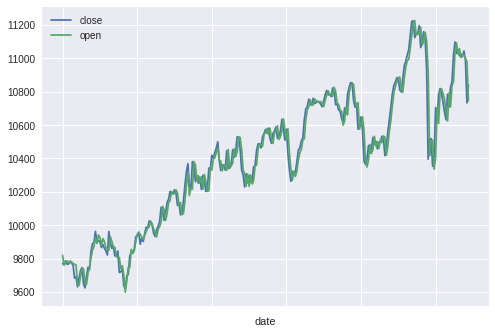

In [0]:
df1[['close', 'open']].plot()

In [0]:
#資料正規化
from sklearn import preprocessing
def normalize(df):
    newdf= df.copy()
    min_max_scaler = preprocessing.MinMaxScaler()
    
    newdf['open'] = min_max_scaler.fit_transform(df.open.values.reshape(-1,1))
    newdf['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
    newdf['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
    newdf['volume'] = min_max_scaler.fit_transform(df.volume.values.reshape(-1,1))
    newdf['close'] = min_max_scaler.fit_transform(df.close.values.reshape(-1,1))
    
    return newdf
df1_norm= normalize(df1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
df1_norm.head()

,open,low,high,volume,close
date,,,,,
2017/2/16,0.135583,0.197406,0.129982,0.252360,0.096273
2017/2/17,0.099387,0.191201,0.089516,0.121474,0.091925
2017/2/18,0.110429,0.205302,0.091355,0.000000,0.106211
2017/2/20,0.115337,0.185561,0.106683,0.175735,0.093789
2017/2/21,0.109816,0.180485,0.088903,0.172511,0.094410


In [0]:
import numpy as np
def data_helper(df, time_frame):
    
    # 資料維度: 開盤價、收盤價、最高價、最低價、成交量, 5維
    number_features = len(df.columns)
    # 將dataframe 轉成 numpy array
    datavalue = df.as_matrix()
    result = []
    # 若想要觀察的 time_frame 為20天, 需要多加一天做為驗證答案
    for index in range( len(datavalue) - (time_frame+1) ): # 從 datavalue 的第0個跑到倒數第 time_frame+1 個
        result.append(datavalue[index: index + (time_frame+1) ]) # 逐筆取出 time_frame+1 個K棒數值做為一筆 instance
    
    result = np.array(result)
    number_train = round(0.9 * result.shape[0]) # 取 result 的前90% instance做為訓練資料
    
    x_train = result[:int(number_train), :-1] # 訓練資料中, 只取每一個 time_frame 中除了最後一筆的所有資料做為feature
    y_train = result[:int(number_train), -1][:,-1] # 訓練資料中, 取每一個 time_frame 中最後一筆資料的最後一個數值(收盤價)做為答案
    
    # 測試資料
    x_test = result[int(number_train):, :-1]
    y_test = result[int(number_train):, -1][:,-1]
    
    # 將資料組成變好看一點
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], number_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], number_features))  
    return [x_train, y_train, x_test, y_test]
# 以20天為一區間進行股價預測
X_train, y_train, X_test, y_test = data_helper(df1_norm, 20)

In [0]:
y_test

array([0.56086957, 0.45838509, 0.49565217, 0.67701863, 0.62795031,
       0.72484472, 0.7484472 , 0.72919255, 0.69503106, 0.66024845,
       0.63167702, 0.72732919, 0.67888199, 0.75279503, 0.77453416,
       0.87391304, 0.92173913, 0.87888199, 0.88571429, 0.87018634,
       0.87639752, 0.86708075, 0.88819876, 0.85341615, 0.69440994])

In [0]:
# Keras 模型建立
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
import keras
def build_model(input_length, input_dim):
    d = 0.3
    model = Sequential()
    model.add(LSTM(256, input_shape=(input_length, input_dim), return_sequences=True))
    model.add(Dropout(d))
    model.add(LSTM(256, input_shape=(input_length, input_dim), return_sequences=False))
    model.add(Dropout(d))
    model.add(Dense(16,kernel_initializer="uniform",activation='relu'))
    model.add(Dense(1,kernel_initializer="uniform",activation='linear'))
    model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
    return model
# 20天、5維
model = build_model( 20, 5 )

Using TensorFlow backend.


In [0]:
# LSTM 模型訓練
# 一個batch有128個instance，總共跑50個迭代
model.fit( X_train, y_train, batch_size=128, epochs=50, validation_split=0.1, verbose=1)

Train on 204 samples, validate on 23 samples
Epoch 1/50
204/204 [==============================] - 2s 11ms/step - loss: 0.2357 - acc: 0.0049 - val_loss: 0.6748 - val_acc: 0.0000e+00
Epoch 2/50
204/204 [==============================] - 1s 4ms/step - loss: 0.2033 - acc: 0.0049 - val_loss: 0.4864 - val_acc: 0.0000e+00
Epoch 3/50
204/204 [==============================] - 1s 4ms/step - loss: 0.1159 - acc: 0.0049 - val_loss: 0.1636 - val_acc: 0.0000e+00
Epoch 4/50
204/204 [==============================] - 1s 4ms/step - loss: 0.0310 - acc: 0.0049 - val_loss: 0.0558 - val_acc: 0.0435
Epoch 5/50
204/204 [==============================] - 1s 4ms/step - loss: 0.0549 - acc: 0.0000e+00 - val_loss: 0.1016 - val_acc: 0.0435
Epoch 6/50
204/204 [==============================] - 1s 4ms/step - loss: 0.0364 - acc: 0.0049 - val_loss: 0.1746 - val_acc: 0.0000e+00
Epoch 7/50
204/204 [==============================] - 1s 4ms/step - loss: 0.0341 - acc: 0.0049 - val_loss: 0.2240 - val_acc: 0.0000e+00
Epoch 

In [0]:
#LSTM 模型預測股價及還原數值
def denormalize(df, norm_value):
    original_value = df['close'].values.reshape(-1,1)
    norm_value = norm_value.reshape(-1,1)
    
    min_max_scaler = preprocessing.MinMaxScaler()
    min_max_scaler.fit_transform(original_value)
    denorm_value = min_max_scaler.inverse_transform(norm_value)
    
    return denorm_value
# 用訓練好的 LSTM 模型對測試資料集進行預測
pred = model.predict(X_test)
# 將預測值與正確答案還原回原來的區間值
denorm_pred = denormalize(df1, pred)
denorm_ytest = denormalize(df1, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


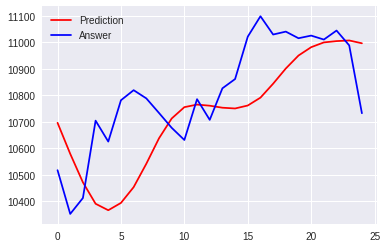

In [0]:
# LSTM 預測股價結果
import matplotlib.pyplot as plt
%matplotlib inline  
plt.plot(denorm_pred,color='red', label='Prediction')
plt.plot(denorm_ytest,color='blue', label='Answer')
plt.legend(loc='best')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


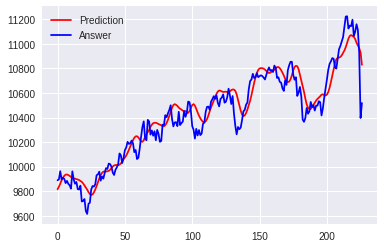

In [0]:
# 先看看訓練集本身的訓練結果
pred = model.predict(X_train)
# 將預測值與正確答案還原回原來的區間值
denorm_pred = denormalize(df1, pred)
denorm_ytrain = denormalize(df1, y_train)

# LSTM 預測股價結果
import matplotlib.pyplot as plt
%matplotlib inline  
plt.plot(denorm_pred,color='red', label='Prediction')
plt.plot(denorm_ytrain,color='blue', label='Answer')
plt.legend(loc='best')
plt.show()

In [0]:
# LSTM 模型訓練 (將validation_split由0.1改成0.05後，成效好多了)
# 一個batch有128個instance，總共跑50個迭代
model.fit( X_train, y_train, batch_size=128, epochs=50, validation_split=0.05, verbose=1)

Train on 215 samples, validate on 12 samples
Epoch 1/50
215/215 [==============================] - 1s 3ms/step - loss: 0.0080 - acc: 0.0047 - val_loss: 0.0451 - val_acc: 0.0833
Epoch 2/50
215/215 [==============================] - 1s 3ms/step - loss: 0.0075 - acc: 0.0047 - val_loss: 0.0426 - val_acc: 0.0833
Epoch 3/50
215/215 [==============================] - 1s 3ms/step - loss: 0.0074 - acc: 0.0047 - val_loss: 0.0394 - val_acc: 0.0833
Epoch 4/50
215/215 [==============================] - 1s 4ms/step - loss: 0.0075 - acc: 0.0047 - val_loss: 0.0360 - val_acc: 0.0833
Epoch 5/50
215/215 [==============================] - 1s 4ms/step - loss: 0.0068 - acc: 0.0047 - val_loss: 0.0373 - val_acc: 0.0833
Epoch 6/50
215/215 [==============================] - 1s 4ms/step - loss: 0.0068 - acc: 0.0047 - val_loss: 0.0330 - val_acc: 0.0833
Epoch 7/50
215/215 [==============================] - 1s 4ms/step - loss: 0.0072 - acc: 0.0047 - val_loss: 0.0367 - val_acc: 0.0833
Epoch 8/50
215/215 [===========